# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
# Pkg.add("Roots")
# Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

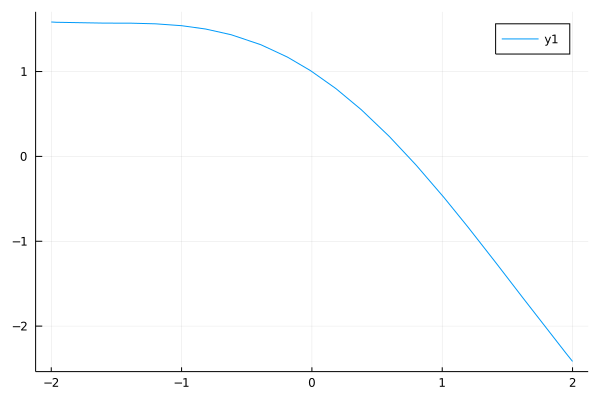

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.1415926535897936, -3.216245299353273e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

### 2. Metody korzytające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

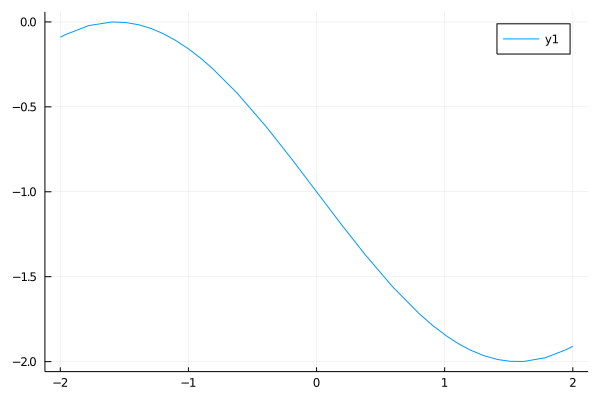

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.6666666666666666,	 fx_1 =  0.1192205941102814
x_2 =  0.7390392624463102,	 fx_2 =  0.0000767690929604
x_3 =  0.7390851332151495,	 fx_3 =  0.0000000000000187
x_4 =  0.7390851332151606,	 fx_4 =  0.0000000000000001



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851344824166
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835389), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851330409081,	 fx_5 =  0.0000000002916313
x_6 =  0.7390851332151607,	 fx_6 =  0.0000000000000000



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 2
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.7369285852997423,	 fx_1 =  0.0036075047762146
x_2 =  0.7390851332151607,	 fx_2 =  0.0000000000000000



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

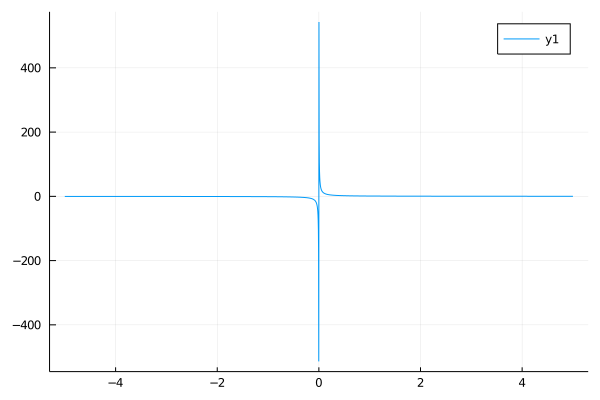

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-1.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-0.0000000000000000,  0.0000000000000000)
(a_2, b_2) = (-0.0000000000000000,  0.0000000000000000)
(a_3, b_3) = (-0.0000000000000000,  0.0000000000000000)
(a_4, b_4) = (-0.0000000000000000,  0.0000000000000000)
(a_5, b_5) = (-0.0000000000000000,  0.0000000000000000)
(a_6, b_6) = (-0.0000000000000000,  0.0000000000000000)
(a_7, b_7) = (-0.0000000000000000,  0.0000000000000000)
(a_8, b_8) = (-0.0000000000000000,  0.0000000000000000)
(a_9, b_9) = (-0.0000000000000000,  0.0000000000000000)
(a_10, b_10) = (-0.0000000000000000,  0.0000000000000000)
(a_11, b_11) = (-0.0000000000000000,  0.0000000000000000)
(a_12, b_12) = (-0.0000000000000000,  0.0000000000000000)
(a_13, b_13) = (-0.0000

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Array{Float64,1}:
 0.0
 3.0

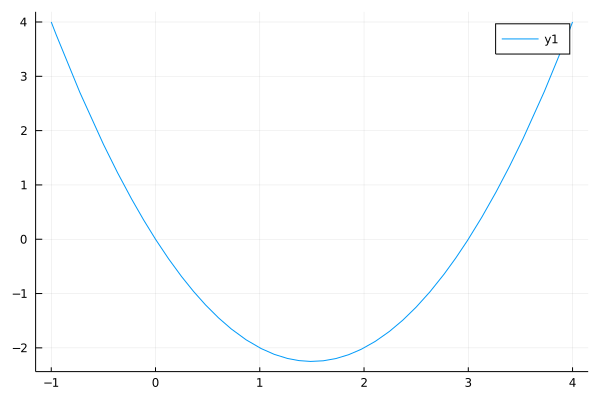

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

# A.

## 1.
## Testowane metody
#### * (B) bisekcji  
dzielimy przedział na połowy, aż punkt podziału będzie miejscem zerowym (z dokładnością do $\epsilon$)
#### * (N) Newtona   
dla punktu startowego $x_1$ wyznaczana jest styczna w $f(x_1)$, miejsce przecięcia z osią $OX$ jest przybliżonym miejscem zerowym, jeśli chcemy lepsze przybliżenie, powtarzamy algorytm dla tegoż punktu, aż do osiągnięcia satysfakcjonującego przybliżenia
#### * (S) siecznych 
na dostatecznie małym przedziale zastępujemy krzywą $f(x)$ sieczną, punkt przecięcia tejże siecznej jest przybliżonym pierwiastkiem

### Sześć wybranych funkcji

In [26]:
f1(x) = sin(x) - x/2
f2(x) = x * exp(-x)
f3(x) = (x+3) * (x-1)^2
f4(x) = (x-1)^7
f5(x) = x^3
f6(x) = x^3 - 2*x - 5

f6 (generic function with 1 method)

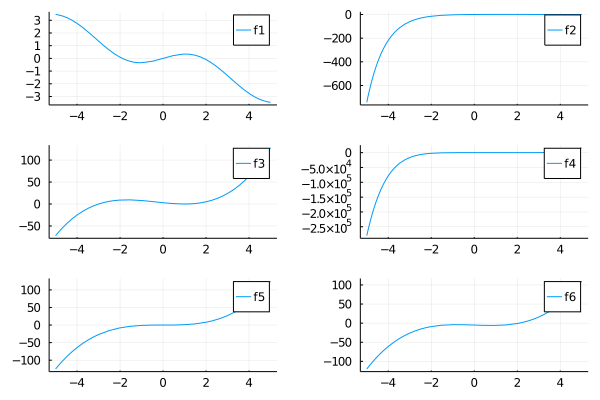

In [27]:
p1 = plot(f1)
p2 = plot(f2)
p3 = plot(f3)
p4 = plot(f4)
p5 = plot(f5)
p6 = plot(f6)

labels = ["f1" "f2" "f3" "f4" "f5" "f6"]
plot(p1, p2, p3, p4, p5, p6, layout=(3,2), label = labels)

In [28]:
# spradzamy, czy znak się zmienia

function is_zero(f,x)
    return sign(f(prevfloat(x))) *sign(f(nextfloat(x))) <= 0
end

is_zero (generic function with 1 method)

In [29]:
# pobieramy liczbę iteracji i wywołań funkcji, przechwytując wyjście na konsolę

function get_output(first_arg, second_arg, third_arg)
    output = ""
    x = 0
    let old_stdout = stdout
        rd, = redirect_stdout()
        try
            x = find_zero(first_arg, second_arg, third_arg, verbose=true)
        finally
            redirect_stdout(old_stdout) # Przywraca oryginalne stdout
        end
        output = String(readavailable(rd))
    end
    
    iters = match(r"(?<=iterations: )(\d+)", output).match
    evals = match(r"(?<=function evaluations: )(\d+)", output).match
    
    return x,iters, evals
end

get_output (generic function with 1 method)

In [30]:
x,output = get_output(f1, (-5,5), Bisection())

(0.0, "0", "3")

In [31]:
function test()
    res_arr = []
    for f in [f1 f2 f3 f4 f5 f6]
        # bisekcja
        row = []
        x, iters, evals = get_output(f, (-5,5), Bisection())
        push!(row,f,'B',parse(Int64, iters), parse(Int64, evals), round(x,digits = 5), is_zero(f,x))
        push!(res_arr,row)
    
        # Newton
        row = []
        D(f) = x->ForwardDiff.derivative(f, float(x))
        x, iters, evals = get_output((f, D(f)), 0, Roots.Newton())
        push!(row,f,'N',parse(Int64, iters), parse(Int64, evals), round(x,digits = 5), is_zero(f,x))
        push!(res_arr,row)
        
        # sieczne 
        row = []
        x, iters, evals = get_output(f, 0, Order1())
        push!(row,f,'S', parse(Int64, iters), parse(Int64, evals), round(x,digits = 5), is_zero(f,x))
        push!(res_arr,row)
        
    end
    return res_arr
end

test (generic function with 1 method)

In [32]:
using Printf

function print_table(x)
    @printf("%4s %8s %6s %6s %8s %8s\n","func","method","iters","evals","root","OK")
    println("-------------------------------------------------")
    for i in 1:size(x,1) 
        @printf("%4s %4s %7s %7s %10s %8s\n",x[i][1],x[i][2],x[i][3],x[i][4],x[i][5],x[i][6]) 
        if i % 3 == 0
            println()
        end
    end
end

print_table (generic function with 1 method)

In [33]:
print_table(test())

func   method  iters  evals     root       OK
-------------------------------------------------
  f1    B       0       3        0.0     true
  f1    N       0       1        0.0     true
  f1    S       0       2        0.0     true

  f2    B       0       3        0.0     true
  f2    N       0       1        0.0     true
  f2    S       0       2        0.0     true

  f3    B      60      62       -3.0     true
  f3    N      26      53        1.0    false
  f3    S      37      39        1.0    false

  f4    B      58      60        1.0     true
  f4    N      33      67    0.99382    false
  f4    S      41      43    0.98792    false

  f5    B       0       3        0.0     true
  f5    N       0       1        0.0     true
  f5    S       0       2        0.0     true

  f6    B      62      64    2.09455     true
  f6    N      19      39    2.09455     true
  f6    S      12      14    2.09455     true



## 2.
Z powyższej tabeli widzimy, że dużą liczbę iteracji generuje m.in. funkcja $f_4(x) = (x-1)^{7}$. Prześledźmy zatem działanie  na niej wszystkich trzech metod.

#### Metoda bisekcji 

In [34]:
find_zero(f4, (0,5), Bisection(), verbose = true)

Results of univariate zero finding:

* Converged to: 1.0000000000000018
* Algorithm: Roots.BisectionExact()
* iterations: 58
* function evaluations: 60
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  5.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  5.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  5.0000000000000000)
(a_5, b_5) = ( 0.0000000011277734,  5.0000000000000000)
(a_6, b_6) = ( 0.0000751018524170,  5.0000000000000000)
(a_7, b_7) = ( 0.0193786621093750,  5.0000000000000000)
(a_8, b_8) = ( 0.3112792968750000,  5.0000000000000000)
(a_9, b_9) = ( 0.3112792968750000,  1.2475585937500000)
(a_10, b_10) = ( 0.6231689453125000,  1.2475585937500000)
(a_11, b_11) = ( 0.8734741210937500,  1.2475585937500000)
(a_12, b_12) = ( 0.9986267089843750,  

1.0

#### Metoda Newtona

In [35]:
D(f) = x->ForwardDiff.derivative(f, float(x))
find_zero((f4, D(f4)), 0, Roots.Newton(), verbose = true)

Results of univariate zero finding:

* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations: 67
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428571428571428,	 fx_1 = -0.3399166770891139
x_2 =  0.2653061224489796,	 fx_2 = -0.1155433473633047
x_3 =  0.3702623906705539,	 fx_3 = -0.0392751106954878
x_4 =  0.4602249062890462,	 fx_4 = -0.0133502651199173
x_5 =  0.5373356339620396,	 fx_5 = -0.0045379777578210
x_6 =  0.6034305433960340,	 fx_6 = -0.0015425343201428
x_7 =  0.6600833229108862,	 fx_7 = -0.0005243331403989
x_8 =  0.7086428482093311,	 fx_8 = -0.0001782295787721
x_9 =  0.7502652984651409,	 fx_9 = -0.0000605832061752
x_10 =  0.7859416843986922,	 fx_10 = -0.0000205932421305
x_11 =  0.8165214437703076,	 fx_11 = -0.0000069999864355
x_12 =  0.8427326660888350,	 fx_12 = -0.0000023794121288
x_13 =  0.8651994280761443,	 fx_13 = -0.0000008088018643


0.9938233080518548

#### Metoda siecznych

In [36]:
find_zero(f4, 0, Order1(), verbose = true)

Results of univariate zero finding:

* Converged to: 0.9879203121361033
* Algorithm: Roots.Secant()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428597380722589,	 fx_1 = -0.3399094728732135
x_2 =  0.2164244633142859,	 fx_2 = -0.1813702625538253
x_3 =  0.3005831613736946,	 fx_3 = -0.0818752401598620
x_4 =  0.3698380190475942,	 fx_4 = -0.0394607544128561
x_5 =  0.4342699903997396,	 fx_5 = -0.0185466090720156
x_6 =  0.4914080931016461,	 fx_6 = -0.0088020962960889
x_7 =  0.5430202253572963,	 fx_7 = -0.0041617774635777
x_8 =  0.5893097620511607,	 fx_8 = -0.0019706098941454
x_9 =  0.6309399049379361,	 fx_9 = -0.0009325661014505
x_10 =  0.6683399263319808,	 fx_10 = -0.0004414203492747
x_11 =  0.7019534319634678,	 fx_11 = -0.0002089242623564
x_12 =  0.7321590021404037,	 fx_12 = -0.0000988870406555
x_13 = 

0.9879203121361033

## 3.

### Metoda bisekcji

Niedokładność obliczeń komputerowych może spowodować, że funkcja $f(x)$ przestanie być ciągła. Znalezione zostają przedziały, w których $f(x)$ zmienia znak, kiedy w rzeczywistości tego nie robi. Wtedy algorytm może zbliżyć się do złego miejsca dla x.

### Metoda Newtona

Rozważmy funkcję $g(x) = \sqrt[3]x$ dla $x=1$. Spełnia ona założenia metody Newtona.

In [37]:
g(x) = cbrt(x)

g (generic function with 1 method)

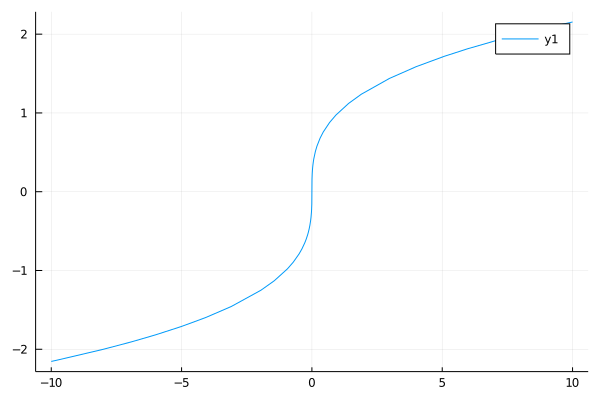

In [38]:
plot(g,-10,10)

In [39]:
D(g) = x->ForwardDiff.derivative(g, float(x))

D (generic function with 1 method)

In [40]:
find_zero((g, D(g)), 1, Roots.Newton(), verbose = true)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 =  1.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 = -2.0000000000000000,	 fx_1 = -1.2599210498948732
x_2 =  4.0000000000000009,	 fx_2 =  1.5874010519681996
x_3 = -8.0000000000000000,	 fx_3 = -2.0000000000000000
x_4 =  16.0000000000000000,	 fx_4 =  2.5198420997897464
x_5 = -32.0000000000000071,	 fx_5 = -3.1748021039363992
x_6 =  64.0000000000000000,	 fx_6 =  4.0000000000000000
x_7 = -128.0000000000000000,	 fx_7 = -5.0396841995794928
x_8 =  256.0000000000000568,	 fx_8 =  6.3496042078727983
x_9 = -512.0000000000000000,	 fx_9 = -8.0000000000000000
x_10 =  1024.0000000000000000,	 fx_10 =  10.0793683991589855
x_11 = -2048.0000000000004547,	 fx_11 = -12.6992084157455967
x_12 =  4096.0000000000000000,	 fx_12 =  16.0000000000000000
x_13 = -8192.0000000000000000,	 fx_13 = -20.1587367983179711
x_14 =  16384.0000000000036380,	 fx_14 =  25.3984168314911933
x_15 = -32768.0000

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = -2.1990232555520005e12. Too many steps taken. ")[39m

#### Obserwacje
Metoda Newtona nie działa dla powyższego przykładu. Pojawia się tutaj problem rozbieżnego cyklu iteracji. Spójrzmy na wykres oraz styczną w ounkcie $(x,f(x))$, gdzie $x=1$ jest punktem początkowym.

In [41]:
# tangent line at x0 = 1 to f function 

function tangent(g, x0, x)
    h = 0.00001
    der = (g(x0 + h) - g(x0))/h
    return g(x0) + der * (x - x0)
end

tangent (generic function with 1 method)

In [42]:
tangent_line1(x) = tangent(g,1,x)

tangent_line1 (generic function with 1 method)

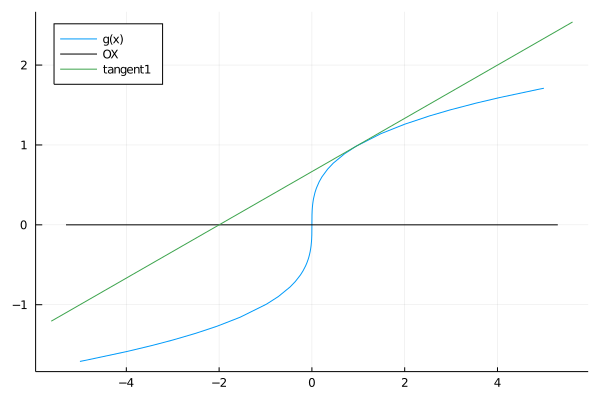

In [43]:
xaxis(x) = 0
plot(g,  label="g(x)", legend=:topleft)
plot!(xaxis, color="black", label="OX")
plot!(tangent_line1, label="tangent1")

#### Obserwacje - cd.
Styczna do wykresu funkcji $g(x)$ przecina oś OX w $x=-2$. Zatem teraz wyznaczamy styczną w punkcie $(-2,g(-2)$.

In [44]:
tangent_line2(x) = tangent(g,-2,x)

tangent_line2 (generic function with 1 method)

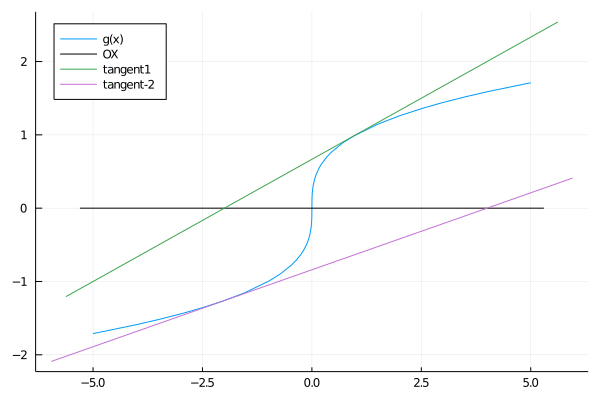

In [45]:
plot!(tangent_line2, label="tangent-2")

#### Obserwacje - cd.
Kolejno teraz styczna przecina oś OX w $x=4$. Kolejne punkty przecięcia z osią bedą się coraz bardziej oddalać od środka układu. Dorysujmy 3 kolejne styczne w $(x,g(4)), (x,g(-8)), (x,g(16))$.

In [46]:
tangent_line3(x) = tangent(g,4,x)
tangent_line4(x) = tangent(g,-8,x)
tangent_line5(x) = tangent(g,16,x)

tangent_line5 (generic function with 1 method)

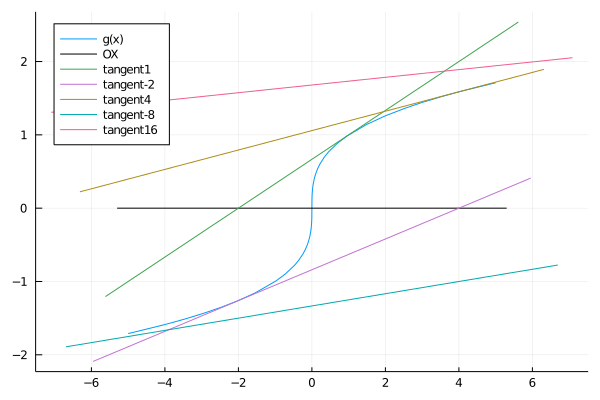

In [47]:
plot!(tangent_line3, label="tangent4")
plot!(tangent_line4, label="tangent-8")
plot!(tangent_line5, label="tangent16")

#### Obserwacje - cd.
Metoda nie doprowadzi do wyznaczenia pierwiastka $x=0$, w każdej kolejnej iteracji oddalamy się od niego, raz do $\infty$, następnie do $-\infty$.

### Metoda siecznych

Tutaj również wykorzystamy funkcję $g(x) = \sqrt[3]x$ dla $x=1$.

In [48]:
find_zero(g, 1, Order1(), verbose = true)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Secant()

Trace:
x_0 =  1.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 = -2.0000060553430346,	 fx_1 = -1.2599223214359490
x_2 = -0.3274819346166014,	 fx_2 = -0.6892801669110555
x_3 =  1.6927643720322905,	 fx_3 =  1.1917875289511943
x_4 =  0.4127974899418465,	 fx_4 =  0.7445816848597556
x_5 = -1.7183014440799682,	 fx_5 = -1.1977507506057830
x_6 = -0.4041467189502184,	 fx_6 = -0.7393436589319288
x_7 =  1.7153928355804768,	 fx_7 =  1.1970745488112253
x_8 =  0.4051144846634640,	 fx_8 =  0.7399333301656660
x_9 = -1.7157151060493148,	 fx_9 = -1.1971495088265423
x_10 = -0.4050070394043588,	 fx_10 = -0.7398679088580160
x_11 =  1.7156792870489310,	 fx_11 =  1.1971411778013865
x_12 =  0.4050189788022747,	 fx_12 =  0.7398751790942570
x_13 = -1.7156832667998965,	 fx_13 = -1.1971421034444849
x_14 = -0.4050176522152995,	 fx_14 = -0.7398743713050762
x_15 =  1.7156828246036415,	 fx_15 =  1.19714200

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = -1.7156828688232462. Too many steps taken. ")[39m

#### Obserwacje
Metoda siecznych ponownie nie działa.

# B.

###  Wstęga Newtona (basen Newtona)

Źródło: https://computingskillset.com/solving-equations/newton-fractals-explained-examples-and-python-code/

Fraktale Newtona to fraktale utworzone na płaszczyźnie liczb zespolonych metodą Newtona. 
Każdemu z pierwiastków danego wielomianu $p(z)$ przypisujemy inny kolor.
Rozpatrując zbiór punktów, każdy z nich przyjmuje odpowiedni kolor, w zależności do którego pierwiastka zbiega, a by to określić wykorzystujemy właśnie metodę Newtona.

W celu wyrysowania wstegi Newtona użyłam języka Python.

KOD ŹRÓDŁOWY:

``` Python 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


eps = 1.e-8

def newton(z0, f, der, MAX_IT=1000):
    # MAX_IT - max number of iterations

    z = z0
    for _ in range(MAX_IT):
        dz = f(z)/der(z)
        if abs(dz) < eps:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, der, n=200, domain=(-1, 1, -1, 1)):

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=eps))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1


    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, der)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    
    plt.imshow(m, cmap='afmhot', origin='lower')
    plt.axis('off')
    plt.show()
```

### Przykład 1. 
Wygenerowałam wstęgę na podstawie poniższej funkcji:

$$
\begin{align}
f(x) = z^{12} - 1
\end{align}
$$

Jej pochodna:

$$
\begin{align}
f'(x) = 12z^{11}
\end{align}
$$

Zatem kolejne przybliżenia są dane wzorem:

$$
\begin{align}
z_{i+1} = z_i - \frac{z^{12}-1}{12z^{11}}
\end{align}
$$

Ta funkcja ma 12 rzeczywistych i zespolonych pierwiastków: 
$$
\begin{align}
\left[\pm 1, \pm i, \frac{\pm 1 \pm i\sqrt 3}{2}, \frac{\pm \sqrt 3 \pm i}{2}\right]
\end{align}
$$

Spodziewamy się więc 12 kolorów, w zależności od tego, do którego pierwiastka zbiega dany punkt.

```Python 
f = lambda z: z**12 - 1
der = lambda z: 12*z**11

# n**2 - number of points
plot_newton_fractal(f, der, n=500, domain = (-1.5,1.5,-1.5,1.5))
```

In [52]:
using Images

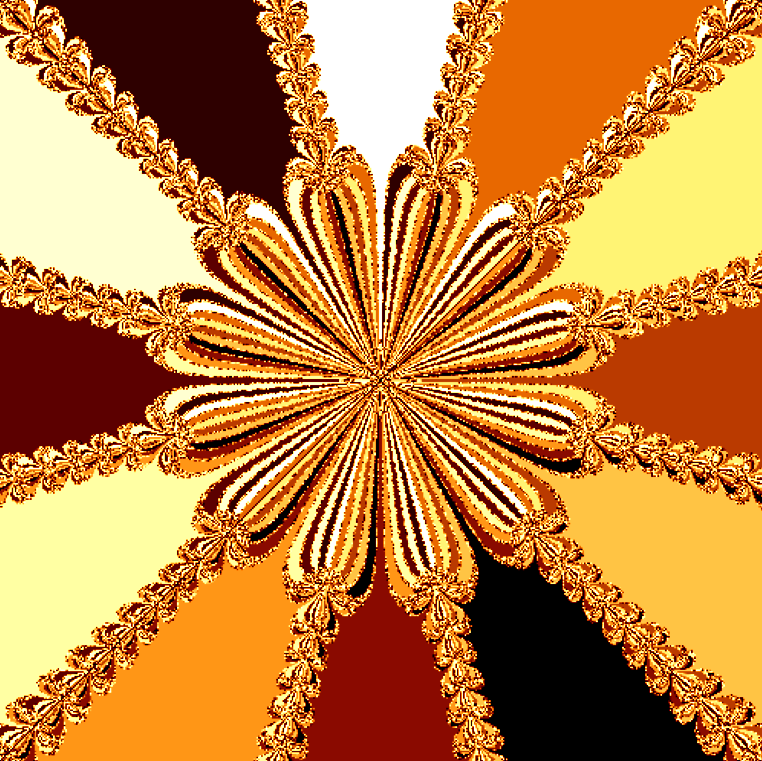

In [53]:
img_path = "newton_fractal1.png"
img = load(img_path)

### Przykład 2. 

Jako kolejny przykład rozważmy funkcję:
$$
\begin{align}
f(x) = (z-2)(z-\frac{1}{2})(z+\frac{3}{2})(z+2)
\end{align}
$$

Pochodna:
$$
\begin{align}
f'(x) = 4z^3 + 3z^2 - \frac{19z}{2} - 4
\end{align}
$$

Pierwiastki:
$$
\begin{align}
\left[-2,\frac{-3}{2}, \frac{1}{2}, 2\right]
\end{align}
$$

Spodziewane 4 kolory.

``` Python 
f = lambda z: (z-2)*(z-1/2)*(z+3/2)*(z+2)
der = lambda z: -4 - (19*z)/2 + 3*z**2 + 4*z**3

# n**2 - number of points
plot_newton_fractal(f, der, n=500, domain = (1.23,1.45,-0.1,0.1))
```

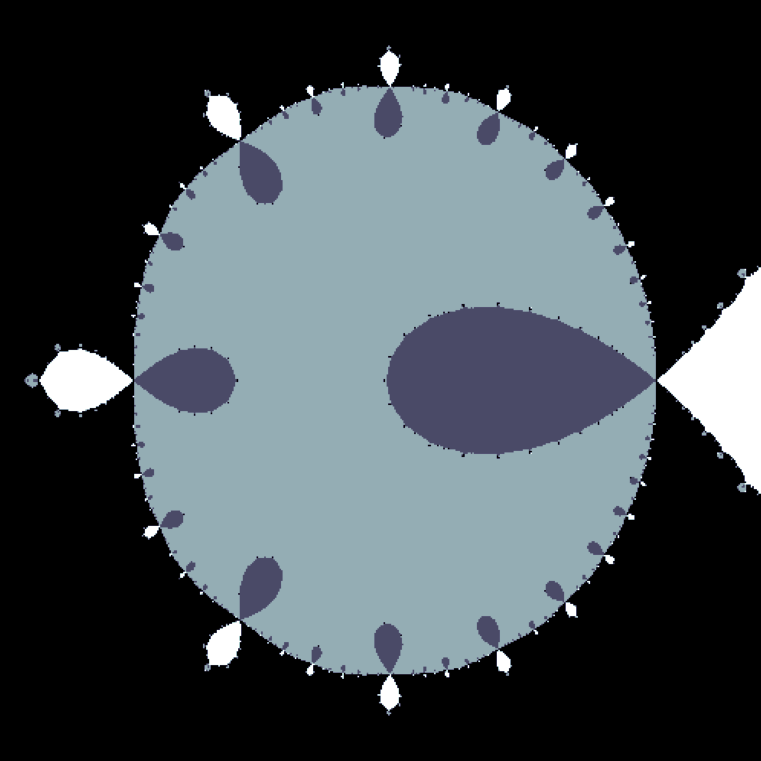

In [51]:
img_path = "newton_fractal2.png"
img = load(img_path)